#DADOS DO ALUNO



- NOME: Vitor Moreira Ramos de Rezende
- Matrícula: 2022036012

#BIBLIOTECAS E DEMAIS FUNCIONALIDADES

In [ ]:
%%capture
pip install gensim

In [ ]:
%%capture
pip install nltk

In [ ]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import random

nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Conjuntos de dados contendo as frases a serem usadas para treinar os modelos.

In [ ]:
import gensim.downloader as api
dataset = api.load("text8")


[==================================================] 100.0% 31.6/31.6MB downloaded


# LIMPEZA DOS DADOS


Retirada das stopwords e transformação das palavras em minúsculas.


In [ ]:
english_stopwords = set(stopwords.words('english'))

In [ ]:
words_lower = [[letter.lower() for letter in letter_list] for letter_list in list(dataset)]
words = [ list(filter(lambda letter: letter not in english_stopwords,letter_list)) for letter_list in words_lower]

# PARÂMETROS

Criação de listas de parâmetros para permitir a criação de modelos com características diferentes.


In [ ]:
vector_size_list = [number for number in range(50, 150, 20)]
len(vector_size_list)

5

In [ ]:
window_list = [number for number in range(1, 17)]
len(window_list)

16

In [ ]:
epochs_list = [number for number in range(3, 10)]
len(epochs_list)

7

In [ ]:
randoms_data_models = [{"vector_size": vector_size_list[random.randint(0, 4)],
                "window": window_list[random.randint(0, 15)], "epochs": epochs_list[random.randint(0, 6)]} for i in range(0,10)]
randoms_data_models

[{'vector_size': 70, 'window': 6, 'epochs': 3},
 {'vector_size': 70, 'window': 10, 'epochs': 4},
 {'vector_size': 50, 'window': 5, 'epochs': 5},
 {'vector_size': 110, 'window': 7, 'epochs': 7},
 {'vector_size': 90, 'window': 10, 'epochs': 9},
 {'vector_size': 70, 'window': 8, 'epochs': 8},
 {'vector_size': 70, 'window': 5, 'epochs': 9},
 {'vector_size': 90, 'window': 15, 'epochs': 3},
 {'vector_size': 70, 'window': 1, 'epochs': 4},
 {'vector_size': 90, 'window': 5, 'epochs': 7}]

# DADOS PARA VALIDAÇÃO

In [ ]:
with open("questions-words.txt", "r", encoding="utf-8") as f:
    questions_words = f.read()
questions_words = questions_words.split('\n')
questions_words.pop(0)
questions_words = questions_words[:1000]
questions_words = [[letter.lower() for letter in letter_list.split(' ')] for letter_list in questions_words]
questions_words[0], len(questions_words)

(['athens', 'greece', 'baghdad', 'iraq'], 1000)

#CBOW

Treinamento de 10 modelos CBOW com variação de parâmetros, sendo esse a variação do word2vec que tenta encontrar a palavra central dado o contexto.

In [ ]:
models_cbow = []
for i in range(0, 10):

  print(f"===== MODELO {i} =====")

  data_model = randoms_data_models[i].copy()

  data_model["id"] = str(data_model["vector_size"]) + str(data_model["window"]) + str(data_model["epochs"])

  print(f"DADOS DO MODELO: ", data_model)

  print("-> CRIANDO O MODELO")
  model_cbow = gensim.models.Word2Vec(words, min_count=1, vector_size=data_model["vector_size"], epochs=data_model["epochs"],
                                window=data_model["window"])
  print("-> MODELO CRIADO")

  mean = 0
  number_passed = 0
  for question in questions_words:
      try:
        analogous_words = model_cbow.wv.most_similar(positive=[question[2], question[1]], negative=question[0],topn=1000)
        analogous = [result[0] for result in analogous_words]
        mean +=  analogous.index(question[3])/len(analogous)
        number_passed += 1
      except IndexError:
        continue
      except ValueError:
        continue
      except KeyError:
        continue
  data_model["mean"] = mean/number_passed

  print(f"MEDIA DO MODELO: ", data_model["mean"])
  print(" ")

  models_cbow.append(data_model)


===== MODELO 0 =====
DADOS DO MODELO:  {'vector_size': 70, 'window': 6, 'epochs': 3, 'id': '7063'}
-> CRIANDO O MODELO
-> MODELO CRIADO
MEDIA DO MODELO:  0.11572847682119224
 
===== MODELO 1 =====
DADOS DO MODELO:  {'vector_size': 70, 'window': 10, 'epochs': 4, 'id': '70104'}
-> CRIANDO O MODELO
-> MODELO CRIADO
MEDIA DO MODELO:  0.09209518072289172
 
===== MODELO 2 =====
DADOS DO MODELO:  {'vector_size': 50, 'window': 5, 'epochs': 5, 'id': '5055'}
-> CRIANDO O MODELO
-> MODELO CRIADO
MEDIA DO MODELO:  0.07835000000000004
 
===== MODELO 3 =====
DADOS DO MODELO:  {'vector_size': 110, 'window': 7, 'epochs': 7, 'id': '11077'}
-> CRIANDO O MODELO
-> MODELO CRIADO
MEDIA DO MODELO:  0.0465409638554217
 
===== MODELO 4 =====
DADOS DO MODELO:  {'vector_size': 90, 'window': 10, 'epochs': 9, 'id': '90109'}
-> CRIANDO O MODELO
-> MODELO CRIADO
MEDIA DO MODELO:  0.03827304550758461
 
===== MODELO 5 =====
DADOS DO MODELO:  {'vector_size': 70, 'window': 8, 'epochs': 8, 'id': '7088'}
-> CRIANDO O MOD

# Skip-Gram

Treinamento de 10 modelos Skip-Gram com variação de parâmetros, sendo esse a variação do word2vec que tenta encontrar o contexto dado a palavra central.


In [ ]:
models_skip_gram = []
for i in range(0, 10):

  print(f"===== MODELO {i} =====")

  data_model = randoms_data_models[i].copy()

  data_model["id"] = str(data_model["vector_size"]) + str(data_model["window"]) + str(data_model["epochs"])


  print(f"DADOS DO MODELO: ", data_model)

  print("-> CRIANDO O MODELO")
  model_skip = gensim.models.Word2Vec(words, min_count=1, vector_size=data_model["vector_size"], epochs=data_model["epochs"],
                                window=data_model["window"], sg=1)
  print("-> MODELO CRIADO")

  mean = 0
  number_passed = 0
  for question in questions_words:
      try:
        analogous_words = model_skip.wv.most_similar(positive=[question[2], question[1]], negative=question[0],topn=1000)
        analogous = [result[0] for result in analogous_words]
        mean +=  analogous.index(question[3])/len(analogous)
        number_passed += 1
      except IndexError:
        continue
      except ValueError:
        continue
      except KeyError:
        continue
  data_model["mean"] = mean/number_passed

  print(f"MEDIA DO MODELO: ", data_model["mean"])
  print(" ")

  models_skip_gram.append(data_model)


===== MODELO 0 =====
DADOS DO MODELO:  {'vector_size': 70, 'window': 6, 'epochs': 3, 'id': '7063'}
-> CRIANDO O MODELO
-> MODELO CRIADO
MEDIA DO MODELO:  0.07518181818181824
 
===== MODELO 1 =====
DADOS DO MODELO:  {'vector_size': 70, 'window': 10, 'epochs': 4, 'id': '70104'}
-> CRIANDO O MODELO
-> MODELO CRIADO
MEDIA DO MODELO:  0.04707789232531505
 
===== MODELO 2 =====
DADOS DO MODELO:  {'vector_size': 50, 'window': 5, 'epochs': 5, 'id': '5055'}
-> CRIANDO O MODELO
-> MODELO CRIADO
MEDIA DO MODELO:  0.055805970149253696
 
===== MODELO 3 =====
DADOS DO MODELO:  {'vector_size': 110, 'window': 7, 'epochs': 7, 'id': '11077'}
-> CRIANDO O MODELO
-> MODELO CRIADO
MEDIA DO MODELO:  0.04018642117376297
 
===== MODELO 4 =====
DADOS DO MODELO:  {'vector_size': 90, 'window': 10, 'epochs': 9, 'id': '90109'}
-> CRIANDO O MODELO
-> MODELO CRIADO
MEDIA DO MODELO:  0.02771412169919634
 
===== MODELO 5 =====
DADOS DO MODELO:  {'vector_size': 70, 'window': 8, 'epochs': 8, 'id': '7088'}
-> CRIANDO O M

#AVALIAÇÃO

O melhor modelo é o sexto do skip-gram, de id '7088' e resultado 0.02767356321839079.

O que é avaliado aqui é a média do quão perto da posição 1 dentre as top 1000 cada palavra está na lista de palavras análogas ao resultado do calculo feito pelo "most_similar". Assim, quanto mais próxima da posição 1 menor será o valor, logo, o mlhor modelo será aquele que possui a menor média final. Tome o exemplo abaixo como exemplificação:

- Palavra a ser avaliada: cachorro.
- lista de palavras análogas feita pelo modelo: [gato, cavalo, cachorro, tigre];
- resultado: 3/4.

Isso é feito com todas as palavras, é somado e o resultado é dividido pelo número total de palavras, chegando na média para cada modelo.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


random_data_indexs = ['randoms_data_' + str(i) for i in range(0,10)]

means_cbow = [model['mean'] for model in models_cbow]
means_skip_gram = [model['mean'] for model in models_skip_gram]

O gráfico mostra que o Skip_Gram é melhor que o CBOW em todos os casos. Isso se mostra condizente com os vários estudos que dizem que o Skip_Gram, mesmo que mais lento, gera resultados melhores que o outro.


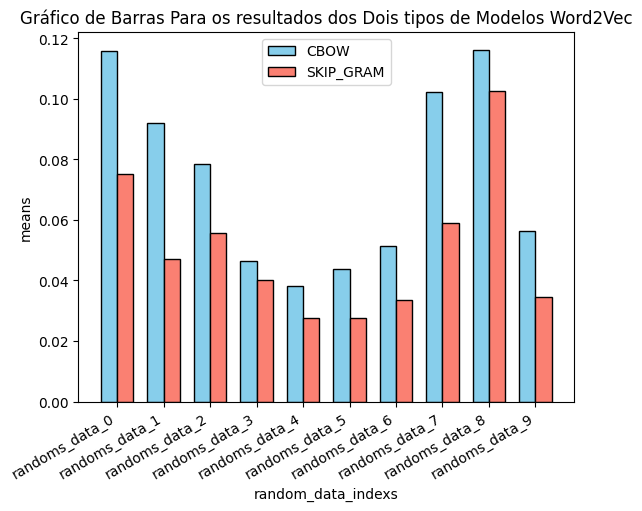

In [ ]:


x = np.arange(len(random_data_indexs))

plt.bar(x - 0.35/2, means_cbow, width=0.35, label='CBOW', color='skyblue', edgecolor='black')
plt.bar(x + 0.35/2, means_skip_gram, width=0.35, label='SKIP_GRAM', color='salmon', edgecolor='black')

plt.xlabel("random_data_indexs")
plt.ylabel("means")
plt.title("Gráfico de Barras Para os resultados dos Dois tipos de Modelos Word2Vec")
plt.xticks(x, random_data_indexs, rotation=30, ha='right')
plt.legend()

plt.show()


É interessante ver que o que parece mais afetar os resultados é o aumento do número de épocas, mas outro ponto importante é que para o skip_gram o tamanho da janela e o tamanho do embedding influenciam muito, pois o randoms_data_2 que, mesmo com mais épocas, possui dois parâmetros menores que o randoms_data_7, resultando em médias parecidas.

In [ ]:
randoms_data_models

[{'vector_size': 70, 'window': 6, 'epochs': 3},
 {'vector_size': 70, 'window': 10, 'epochs': 4},
 {'vector_size': 50, 'window': 5, 'epochs': 5},
 {'vector_size': 110, 'window': 7, 'epochs': 7},
 {'vector_size': 90, 'window': 10, 'epochs': 9},
 {'vector_size': 70, 'window': 8, 'epochs': 8},
 {'vector_size': 70, 'window': 5, 'epochs': 9},
 {'vector_size': 90, 'window': 15, 'epochs': 3},
 {'vector_size': 70, 'window': 1, 'epochs': 4},
 {'vector_size': 90, 'window': 5, 'epochs': 7}]

In [ ]:
randoms_data_models[4]

{'vector_size': 90, 'window': 10, 'epochs': 9}

In [1]:
vector_sizes = [70, 70, 50, 110, 90, 70, 70, 90, 70, 90]
windows = [6, 10, 5, 7, 10, 8, 5, 15, 1, 5]
epochs = [3, 4, 5, 7, 9, 8, 9, 3, 4, 7]

In [2]:
cbow_medias = [0.11572847682119224, 0.09209518072289172, 0.07835000000000004,
               0.0465409638554217, 0.03827304550758461, 0.04392145369284875,
               0.05142135476463836, 0.10228000000000004, 0.11633879093199008,
               0.05626045400238947]

In [3]:
skip_gram_medias = [0.07518181818181824, 0.04707789232531505, 0.055805970149253696,
                    0.04018642117376297, 0.02771412169919634, 0.02767356321839079,
                    0.03340369088811996, 0.059080283353010625, 0.10278228782287833,
                    0.03460370799536503]

In [4]:
import matplotlib.pyplot as plt

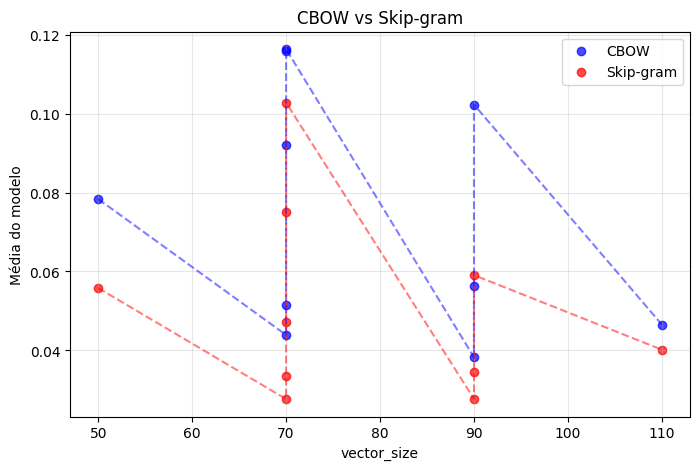

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(vector_sizes, cbow_medias, color='blue', label='CBOW', alpha=0.7)
plt.scatter(vector_sizes, skip_gram_medias, color='red', label='Skip-gram', alpha=0.7)

plt.plot(sorted(vector_sizes),
         [y for _, y in sorted(zip(vector_sizes, cbow_medias))],
         color='blue', linestyle='--', alpha=0.5)
plt.plot(sorted(vector_sizes),
         [y for _, y in sorted(zip(vector_sizes, skip_gram_medias))],
         color='red', linestyle='--', alpha=0.5)

plt.title("CBOW vs Skip-gram")
plt.xlabel("vector_size")
plt.ylabel("Média do modelo")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()


Esse gráfico mostra como o número de épocas afeta muito mais o CBOW que o skip-gram, já que o quando os modelos dos dois tipos possui tamanho de janela de 6 ou 15, eles também tiveram um número de épocas igual a 3, e são nesses dois casos em que para o mesmo tamanho de janela há uma diferença clara entre os dois modelos. Acredito que isso se deva por o skip-gram aprender o contexto a partir da palavra central e não o contrário, o que enriquece o aprendizado.

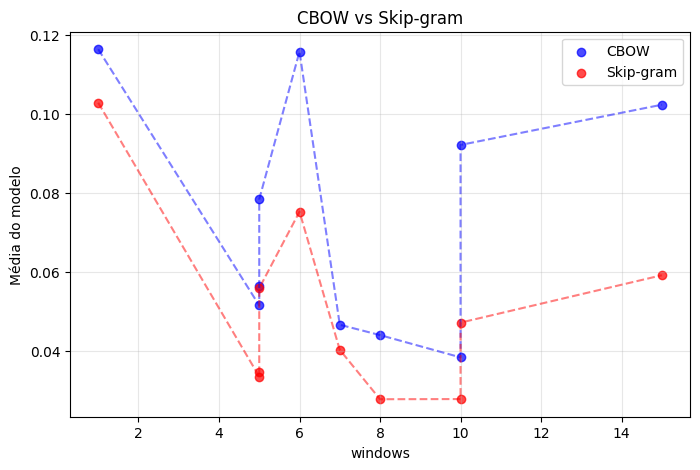

In [8]:
plt.figure(figsize=(8, 5))
plt.scatter(windows, cbow_medias, color='blue', label='CBOW', alpha=0.7)
plt.scatter(windows, skip_gram_medias, color='red', label='Skip-gram', alpha=0.7)

plt.plot(sorted(windows),
         [y for _, y in sorted(zip(windows, cbow_medias))],
         color='blue', linestyle='--', alpha=0.5)
plt.plot(sorted(windows),
         [y for _, y in sorted(zip(windows, skip_gram_medias))],
         color='red', linestyle='--', alpha=0.5)

plt.title("CBOW vs Skip-gram")
plt.xlabel("windows")
plt.ylabel("Média do modelo")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

Como foi dito antes o que parece mais afetar os resultados é o aumento do número de épocas, pois as médias diminuem praticamente junto com o aumento do número de épocas, que é a quantidade de vezes que o modelo passa pelo conjunto de dados durante o treinamento. Outro ponto é que o único caso em que o skip-gram foi pior que o CBOW para o mesmo número de épocas foi no caso em que o parâmetro "window" era 1, enquanto que para o CBOW esse parâmetro era 10.

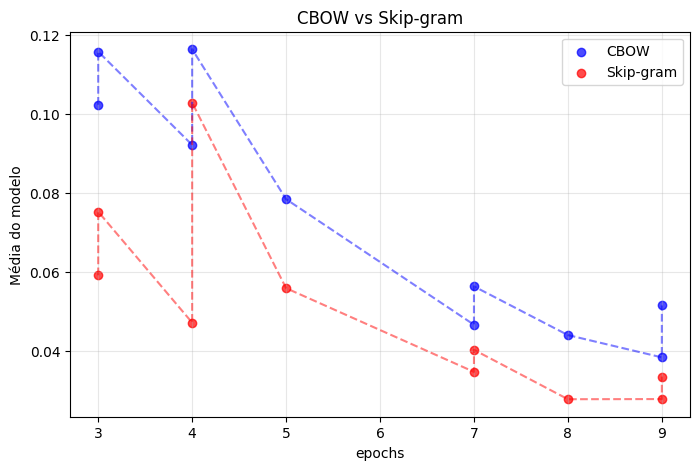

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(epochs, cbow_medias, color='blue', label='CBOW', alpha=0.7)
plt.scatter(epochs, skip_gram_medias, color='red', label='Skip-gram', alpha=0.7)

plt.plot(sorted(epochs),
         [y for _, y in sorted(zip(epochs, cbow_medias))],
         color='blue', linestyle='--', alpha=0.5)
plt.plot(sorted(epochs),
         [y for _, y in sorted(zip(epochs, skip_gram_medias))],
         color='red', linestyle='--', alpha=0.5)

plt.title("CBOW vs Skip-gram")
plt.xlabel("epochs")
plt.ylabel("Média do modelo")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()